<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LinearRegression

X = [[1], [2], [4]]
y = [2, 1, 3]

model = LinearRegression()
model.fit(X, y)
print('Slope:', model.coef_, ', Intercept:', model.intercept_)

data = [[3]]
answer = model.predict(data)
print(f'answer for x={data}: {answer}')

Slope: [0.42857143] , Intercept: 0.9999999999999998
answer for x=[[3]]: [2.28571429]


In [2]:
import pandas as pd

url = 'https://drive.google.com/file/d/1qXW2gchMknwC2dMPEONDcu2_uyn1_jHk/view?usp=drive_link'
file_id = url.split('/')[-2]
download_link = 'https://drive.google.com/uc?id=' + file_id

df_house = pd.read_csv(download_link)
display(df_house)

,Square feet,Num. of bedrooms,Num. of bathrooms,Location quality,Age,Price
0,1810.890416,1,1,6.011211,1,5.299047e+05
1,3827.500072,4,1,9.425393,91,1.051893e+06
2,3061.978796,5,2,7.264268,31,9.587430e+05
3,2595.304695,4,3,6.130551,90,9.104784e+05
4,1046.065242,5,3,1.874588,83,5.714352e+05
...,...,...,...,...,...,...
95,2228.284587,1,1,5.528226,51,6.428185e+05
96,2329.564903,2,3,8.708409,84,7.275732e+05
97,1996.393564,1,1,6.928243,99,5.478183e+05
98,588.966944,3,3,2.466410,52,4.484986e+05


In [7]:
from sklearn.preprocessing import StandardScaler

X = df_house[['Square feet', 'Num. of bedrooms', 'Num. of bathrooms', 'Location quality', 'Age']] #independant variables
y = df_house['Price'] #dependant variable

scaler = StandardScaler()
X = scaler.fit_transform(X) ##scale the data// 단위 때문에 특정 변수로 인한 데이터 왜곡이 생길 수 있음. 단위 스케일링

model = LinearRegression()
model.fit(X, y)

print('Model Coefficients:', model.coef_)
print('Model Intercept:', model.intercept_)

Model Coefficients: [199981.19318373  54558.88402467  19699.99989604   2629.50962512
  -1754.18812784]
Model Intercept: 676515.951151


Initial Minus Log-Likelihood: 2.4194419747753715
After 1000 Iterations
  Slope (m): 4.231329481328936
  Intercept (b): -10.376838021154402
  Minus Log-Likelihood: 0.23512012979385025




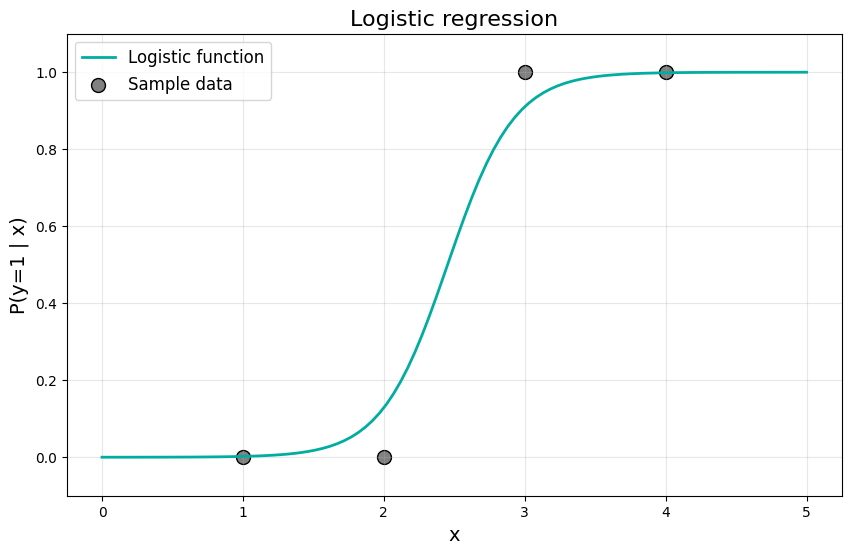

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
y = np.array([0, 0, 1, 1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def minus_log_likelihood(m, b, x, y):
    z = m * x + b
    predictions = sigmoid(z)
    likelihood = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return likelihood

def compute_gradients(m, b, x, y):
    z = m * x + b
    predictions = sigmoid(z)
    dm = np.sum((predictions - y) * x)
    db = np.sum(predictions - y)
    return dm, db

def fit(x, y, m_init, b_init, learning_rate, num_iterations):
    m, b = m_init, b_init
    initial_mll = minus_log_likelihood(m, b, x, y)
    for _ in range(num_iterations):
        dm, db = compute_gradients(m, b, x, y)
        m -= learning_rate * dm
        b -= learning_rate * db
    final_mll = minus_log_likelihood(m, b, x, y)
    return m, b, initial_mll, final_mll

m_init, b_init = 0.5, -0.2
learning_rate = 0.1
num_iterations = 1000
m_final, b_final, initial_mll, final_mll = fit(
    x, y, m_init, b_init, learning_rate, num_iterations)
print(f'Initial Minus Log-Likelihood: {initial_mll}')
print(f'After {num_iterations} Iterations')
print(f'  Slope (m): {m_final}')
print(f'  Intercept (b): {b_final}')
print(f'  Minus Log-Likelihood: {final_mll}\n\n')

x_range = np.linspace(min(x) - 1, max(x) + 1, 100)
logistic_function = sigmoid(m_final * x_range + b_final)
plt.figure(figsize=(10, 6))
plt.plot(x_range, logistic_function, label='Logistic function', color='#01ADA1', linewidth=2)
plt.scatter(x, y, color='gray', label='Sample data', s=100, edgecolor='black')
plt.title('Logistic regression', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('P(y=1 | x)', fontsize=14)
plt.ylim(-0.1, 1.1)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()